## Chapter 6

### Algorithm Examples

In [2]:
from importlib import reload
import utilities as utils
reload(utils)
import numpy as np
import matplotlib.pyplot as plt

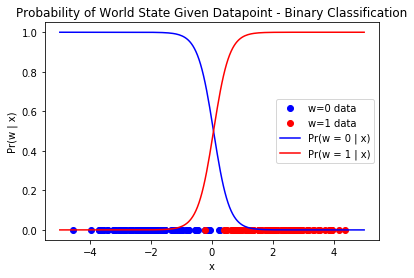

In [10]:
mu_0, var_0 = -2., 1.0
mu_1, var_1 = 2., 1.0
num_labels = 2
n_samples = 100
distro = np.random.RandomState(seed=0)
data = np.empty((1, 2*n_samples))
data[0, :n_samples] = np.sqrt(var_0) * distro.randn(n_samples) + mu_0
data[0, n_samples:] = np.sqrt(var_1) * distro.randn(n_samples) + mu_1
labels = np.empty((2*n_samples,))
labels[:n_samples] = 0
labels[n_samples:] = 1

sample_pts = 200
test_data = np.linspace(-5, 5, 200)
Probs = np.zeros((2, sample_pts))
for i,t in enumerate(test_data):
    _, _, _, postr_probs = utils.basic_generative_classifier(num_labels, data, labels, new_datapoint=np.array([[t]]))
    Probs[:, i] = postr_probs
plt.figure()
plt.plot(data[0, :n_samples], np.zeros((n_samples,)).T, 'bo', label='w=0 data')
plt.plot(data[0, n_samples:], np.zeros((n_samples,)).T, 'ro', label='w=1 data')
plt.plot(test_data, Probs[0, :], 'b', label='Pr(w = 0 | x)')
plt.plot(test_data, Probs[1, :], 'r', label='Pr(w = 1 | x)')
plt.xlabel('x')
plt.ylabel('Pr(w | x)')
plt.title('Probability of World State Given Datapoint - Binary Classification')
plt.legend()
plt.show()

### Problem 1

* (i) This is a classification problem: $w = \{ M, F\}$ is  _discrete_. $\mathbf{x}$ could be the _continuous_ shape generated by the outline of a face in an image.
* (ii) This is a regression problem: $w = \text{all possible joint angles}$ is _continuous_.  $\mathbf{x}$ could be the _continuous_ parametrization of lines connecting joints in an image.
* (iii) This is a classification problem: $w = \{ H, S, D, C \}$ is _discrete_.  $\mathbf{x}$ could be the _continuous_ shape generated by the outline of the suit in the upper-right-hand corner of the card.
* (iv) This is a classification problem: $w = \{ \text{match}, \tilde{\text{match}} \}$ is _discrete_.  $\mathbf{x}$ could be the _continuous_ difference between two image pixelwise intensities in RGB channels.
* (v) This is a regression problem: $w = \{ \text{all possible 3D points} \}$ is _continuous_.  $\mathbf{x}$ could be the _discrete_ combination of camera pose and $(x, y)$ pixels of the desired point for each camera in a countable set of cameras.

### Problem 2

#### Discriminative model

\begin{eqnarray}
Pr(w=m \ | x) &=& \text{Cat}_w [ \mathbf{\bar \lambda}_{1 \cdots M} ] \\
\mathbf{\bar \lambda}_m &=& \frac{\exp [y_m]}{\sum_{k = 1}^M \exp [y_k]}
\end{eqnarray}

where the $\{y_k\}$ are learned values from training data.  This model utilizes a _softmax_ activation model.

#### Generative model

\begin{eqnarray}
Pr(x \ | w=m) &=& \text{Cat}_x [ \mathbf{\lambda}_{1 \cdots K}^m ] \\
Pr(w) &=& \text{Cat}_w [ \mathbf{\lambda}_{1 \cdots M}^{\text{prior}} ] \\
Pr(w=m \ | x) &=& \frac{Pr(x \ | w=m) Pr(w)}{\sum_{j=1}^M Pr(x \ | w=j) Pr(w)}
\end{eqnarray}

The $\mathbf{\lambda}_{1 \cdots K}^m$ and $\mathbf{\lambda}_{1 \cdots M}^{\text{prior}}$ are learned from training.

### Problem 3

Using the assumption that the distributions are already modeled:

\begin{eqnarray}
Pr(w=w^* \ | \ x) &=& \frac{Pr(x \ | w=w^*) Pr(w)}{\int_{-\infty}^\infty Pr(x \ | w=u) Pr(w) du}
\end{eqnarray}

### Problem 4

\begin{eqnarray}
Pr(w | x) &=& \text{Beta}_w [ \bar \alpha, \bar \beta ] \\
\bar \alpha &=& (\phi_\alpha x)^2 \\
\bar \beta &=& (\phi_\beta x)^2
\end{eqnarray}

$\phi_\alpha, \phi_\beta$ are learned by training. $\bar \alpha, \bar \beta \ge 0$ as required for the beta distribution.

### Problem 5

Look at the log-likelihood:

\begin{eqnarray}
L &=& -\frac{I}{2} \log \sigma^2 - \frac{I}{2} \log 2 \pi - \sum_{i=1}^I \frac{(w_i - \phi_0 - \phi_1 x_i)^2}{2 \sigma^2}
\end{eqnarray}

To find the maximum-likelihood estimates, look at the parameter values $\bigl ( \hat \phi_0, \hat \phi_1, \hat \sigma^2 \bigr )$ where the derivatives vanish.  Start with $\hat \phi_0$:

\begin{eqnarray}
0 &=& \frac{\partial L}{\partial \phi_0} = \frac{1}{2 \hat \sigma^2} \sum_{i=1}^I 2 (w_i - \hat \phi_0 - \hat \phi_1 x_i) \\
&=& \sum_{i=1}^I (w_i - \hat \phi_0 - \hat \phi_1 x_i) \\
&\triangleq& I \mu_w - I \hat \phi_0 - \hat \phi_1 I \mu_x \\
I \hat \phi_0 &=& I \mu_w - \hat \phi_1 I \mu_x \\
\hat \phi_0 &=& \mu_w - \hat \phi_1 \mu_x
\end{eqnarray}

Next, look at $\phi_1$:

\begin{eqnarray}
0 &=& \frac{\partial L}{\partial \phi_1} = \frac{1}{2 \hat \sigma^2} \sum_{i=1}^I 2 x_i (w_i - \hat \phi_0 - \hat \phi_1 x_i) \\
&=& \sum_{i=1}^I x_i (w_i - \hat \phi_0 - \hat \phi_1 x_i) \\
\text{(plug in $\hat \phi_0$)} &=& \sum_{i=1}^I x_i \bigl ( w_i - \mu_w + \hat \phi_1 (\mu_x - x_i) \bigr ) \\
&=& \sum_{i=1}^I x_i w_i - I \mu_w \mu_x + \hat \phi_1 \bigl ( I \mu_x^2 - \sum_{i=1}^I x_i^2 \bigr ) \\
\hat \phi_1 \bigl ( \sum_{i=1}^I x_i^2 - I \mu_x^2 \bigr ) &=& \sum_{i=1}^I x_i w_i - I \mu_w \mu_x \\
\hat \phi_1 &=& \frac{\sum_{i=1}^I x_i w_i - I \mu_w \mu_x}{\sum_{i=1}^I x_i^2 - I \mu_x^2}
\end{eqnarray}

Finally, $\sigma^2$:

\begin{eqnarray}
0 &=& \frac{\partial L}{\partial \sigma^2} = -\frac{I}{2 \hat \sigma^2} + \frac{1}{2 (\hat \sigma^2)^2} \sum_{i=1}^I (w_i - \hat \phi_0 - \hat \phi_1 x_i)^2 \\
&=& -I + \frac{1}{\hat \sigma^2} \sum_{i=1}^I (w_i - \hat \phi_0 - \hat \phi_1 x_i)^2 \\
I \hat \sigma^2 &=& \sum_{i=1}^I (w_i - \hat \phi_0 - \hat \phi_1 x_i)^2 \\
\hat \sigma^2 &=& \frac{\sum_{i=1}^I (w_i - \hat \phi_0 - \hat \phi_1 x_i)^2}{I}
\end{eqnarray}

### Problem 6

\begin{eqnarray}
Pr \biggl ( \begin{bmatrix}
w \\
x
\end{bmatrix} \biggr ) &=& \text{Norm}_{[w, x]^T} \biggl [ \begin{bmatrix}
\mu_x \\
\mu_w
\end{bmatrix}, 
\begin{bmatrix}
\sigma_{ww}^2 & \sigma_{wx}^2 \\
\sigma_{wx}^2 & \sigma_{xx}^2
\end{bmatrix}
\biggr ]
\end{eqnarray}

Considering the results of Section 5.5, it is true that:

\begin{eqnarray}
Pr(w \ | \ x = x^{*}) &=& \text{Norm}_{w} \bigl [ \mu_w + \frac{\sigma_{wx}^2}{\sigma_{xx}^2}(x^* - \mu_x), \sigma_{ww}^2 - \frac{(\sigma_{wx}^2)^2}{\sigma_{xx}^2} \bigr ] \\
&\equiv& \text{Norm}_{w} \bigl [ \bigl ( \mu_w - \frac{\sigma_{wx}^2}{\sigma_{xx}^2} \mu_x \bigr ) +  \frac{\sigma_{wx}^2}{\sigma_{xx}^2} x^*, \sigma_{ww}^2 - \frac{(\sigma_{wx}^2)^2}{\sigma_{xx}^2} \bigr ] \\
&\triangleq& \text{Norm}_w [\phi_0 + \phi_1 x^*, \sigma^2 ]
\end{eqnarray}

### Problem 7

On the decision boundary,

\begin{eqnarray}
Pr(w = 1 \ | \ x) &=& 0.5
&=& Pr(w = 0 \ | \ x)
\end{eqnarray}

regardless of the prior.  For this problem, use a uniform prior:

\begin{eqnarray}
Pr(w = 0) = Pr(w = 1) = 0.5
\end{eqnarray}

Using Bayes' rule:

\begin{eqnarray}
Pr(w = 1 \ | \ x) &=& \frac{Pr(x \ | \ w = 1) Pr(w=1)}{Pr(x \ | \ w = 0) Pr(w=0) + Pr(x \ | \ w = 1) Pr(w=1)} \\
\text{(plug in values)} \ \ 0.5 &=& \frac{0.5 \cdot Pr(x \ | \ w = 1)}{0.5 \cdot Pr(x \ | \ w = 0) + 0.5 \cdot Pr(x \ | \ w = 1)} \\
0.5 \cdot Pr(x \ | \ w = 0) + 0.5 \cdot Pr(x \ | \ w = 1) &=& Pr(x \ | \ w = 1) \\
0.5 \cdot Pr(x \ | \ w = 0) &=& 0.5 \cdot Pr(x \ | \ w = 1) \\
Pr(x \ | \ w = 0) &=& Pr(x \ | \ w = 1)
\end{eqnarray}

Model the probability distributions as univariate normals:

\begin{eqnarray}
Pr(x \ | \ w = 0) &=& \text{Norm}_x [ \mu_0, \sigma^2_0 ] \\
Pr(x \ | \ w = 1) &=& \text{Norm}_x [ \mu_1, \sigma^2_1 ]
\end{eqnarray}

So, for a point $x^*$ on the decision boundary, the condition above can be rewritten as:

\begin{eqnarray}
Pr(x^* \ | \ w = 0) &=& Pr(x^* \ | \ w = 1) \\
\text{Norm}_{x^*} [ \mu_0, \sigma^2_0 ] &=& \text{Norm}_{x^*} [ \mu_1, \sigma^2_1 ] \\
\log \text{Norm}_{x^*} [ \mu_0, \sigma^2_0 ] &=& \log \text{Norm}_{x^*} [ \mu_1, \sigma^2_1 ] \\
-\frac{I}{2} \log \sigma_0^2 - \frac{I}{2} \log 2 \pi - \frac{(x^* - \mu_0)^2}{2 \sigma_0^2} &=& -\frac{I}{2} \log \sigma_1^2 - \frac{I}{2} \log 2 \pi - \frac{(x^* - \mu_1)^2}{2 \sigma_1^2} \\
\frac{(x^* - \mu_1)^2}{2 \sigma_1^2} - \frac{(x^* - \mu_0)^2}{2 \sigma_0^2} + \frac{I}{2} \bigl ( \log \sigma_0^2 - \log \sigma_1^2 \bigr ) &=& 0
\end{eqnarray}

which can be rewritten in the desired form of a quadratic equation:

\begin{eqnarray}
\Bigl ( \frac{1}{2 \sigma_0^2} - \frac{1}{2 \sigma_1^2} \Bigr ) (x^*)^2 + \Bigl ( \frac{\mu_1^2}{\sigma_1^2} - \frac{\mu_0^2}{\sigma_0^2} \Bigr ) x^* + \Bigl ( \frac{\mu_0^2}{2 \sigma_0^2} - \frac{\mu_1^2}{2 \sigma_1^2} + \frac{I}{2} \bigl ( \log \sigma_0^2 - \log \sigma_1^2 \bigr ) \Bigr ) &=& 0
\end{eqnarray}

The shape of the decision boundary for the classifier of Section 6.4.1 _does not_ take the form of this equation.  The next problem shows this.

### Problem 6.8



Using the sigmoid function for the conditional probability density function $Pr(w \ | \ x)$, we are looking for coefficients $\phi_0, \phi_1, \phi_2$ that generate the decision boundary given equal priors.

\begin{eqnarray}
\text{sig}[\phi_0 + \phi_1 x^* + \phi_2 (x^*)^2] &=& \frac{1}{2}
\end{eqnarray}

From this it follows that:

\begin{eqnarray}
\exp [-\phi_0 - \phi_1 x^* - \phi_2 (x^*)^2] &=& 1 \\
\text{(take the log)} \ \ -(\phi_0 + \phi_1 x^* + \phi_2 (x^*)^2) &=& 0 \\
\phi_0 + \phi_1 x^* + \phi_2 (x^*)^2 &=& 0
\end{eqnarray}

Following the result of Problem 7 above, we compute the coefficients that give the desired decision boundary:

\begin{eqnarray}
\phi_2 &=& \frac{1}{2 \sigma_0^2} - \frac{1}{2 \sigma_1^2} \\
&\triangleq& \frac{1}{2 \sigma^2} - \frac{1}{2 \cdot 1.5 \sigma^2} \\
&=& \frac{1}{2 \sigma^2} - \frac{1}{3 \sigma^2} = \frac{1}{6 \sigma^2} \\
\phi_1 &=& \frac{\mu_1^2}{\sigma_1^2} - \frac{\mu_0^2}{\sigma_0^2} \\
&=& 0 \\
\phi_0 &=& \frac{\mu_0^2}{2 \sigma_0^2} - \frac{\mu_1^2}{2 \sigma_1^2} + \frac{I}{2} \bigl ( \log \sigma_0^2 + \log \sigma_1^2 \bigr ) &=& 0 - 0 + \frac{I}{2} \bigl ( \log \sigma_0^2 - \log \sigma_1^2 \bigr ) \\
&=& \frac{I}{2} \bigl ( \log \sigma^2 - \log 1.5 \cdot \sigma^2 \bigr ) \\
&=& \frac{I}{2} \bigl ( \log \sigma^2 - \log 1.5 - \log \sigma^2 \bigr ) \\
&=& - \frac{I}{2} \log 1.5 \\
\end{eqnarray}

### Problem 9

For the generative model, the number of parameters to train is $2N$, the number of elements from the two multivariate mean vectors, plus $N(N+1)$, the number of _unique_ elements in the two multivariate covariance matrices, plus 1 for the prior Bernoulli coefficient $\lambda_p$.  The total number of parameters is then $2N + N(N+1) + 1$.

The discriminative model is much simpler.  There are only $N$ weights on the sampled multivariate datapoint $\mathbf{x}^*$ plus 1 for any bias. The total number of parameters is then $N+1$.

For lower dimensions, the training effort for each model will be comparable, and construction of the prior will be straightforward.  The generative model may even provide more insight here, because we could understand an underlying relationship between the world and the data.

For higher dimensions the power of the discriminative classifier dominates.  Constructing any kind of meaningful prior here could be challenging.

### Problem 10

I would set this up as a two-step classification procedure.  First, I would classify pixels into two sets: foreground pixels and background pixels.  Then, given that shadow can sometimes be classified as foreground, I would do a second binary classification on the foreground pixels into _actual_ foreground pixels and shadow pixels.  This second phase would require a retrain on data taken from the original background subtraction step.